#Analiza exploratorie a datelor

##Incarcare librarii

In [1]:
#incarcare librarii EDA
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
import numpy as np

In [2]:
# Incarcare date din CSV
file_path = 'licee_all.csv'
data = pd.read_csv(file_path)

##Explorare, statistici descriptive si vizualizarea datelor

In [3]:
# Vizualizare sample date
print(data.head())

   Judet  idSchool  bulgara  croata  engleza  germana  italiana  maghiara   
0   ALBA        36        0       0        0        1         0         2  \
1   ARAD        41        0       0        0        1         0         1   
2  ARGES        43        0       0        0        0         0         0   
3  BACAU        36        0       0        0        0         0         0   
4  BIHOR        51        0       0        0        1         0        14   

   neogreaca  polona  ...  slovaca  ucraineana  Nr_elevi  Nr_profesori   
0          0       0  ...        0           0     21419          2416  \
1          0       0  ...        1           0     31643          3166   
2          0       0  ...        0           0     29802          3057   
3          0       0  ...        0           0     27915          3055   
4          0       0  ...        1           0     41575          4430   

   Elevi_cu_BAC  Ateliere_scolare  Laboratoare  Echipamente  Terenuri_sport   
0          18

In [4]:
# Calcul medie, mediana, deviatie standard
media = data.drop('Judet', axis=1).mean()
mediana = data.drop('Judet', axis=1).median()
deviatie_standard = data.drop('Judet', axis=1).std()

# Creare dataframe nou pentru organizare indicatori statistici
statistici_descriptive = pd.DataFrame({
    'Media': media,
    'Mediana': mediana,
    'Deviatie Standard': deviatie_standard
})

# Afisare dataframe
print(statistici_descriptive)

                         Media  Mediana  Deviatie Standard
idSchool             35.833333     33.0          18.475979
bulgara               0.023810      0.0           0.154303
croata                0.023810      0.0           0.154303
engleza               0.071429      0.0           0.341650
germana               0.547619      0.0           0.942296
italiana              0.023810      0.0           0.154303
maghiara              3.000000      0.0           6.551857
neogreaca             0.023810      0.0           0.154303
polona                0.023810      0.0           0.154303
romana               33.738095     31.5          18.433876
romani                0.023810      0.0           0.154303
rusa                  0.023810      0.0           0.154303
sarba                 0.023810      0.0           0.154303
slovaca               0.047619      0.0           0.215540
ucraineana            0.071429      0.0           0.260661
Nr_elevi          26345.309524  21616.0       16223.1316

In [5]:
# Minime si maxime pentru coloanele numerice
numeric_data = data.select_dtypes(include='number')

maxime = numeric_data.max()
minime = numeric_data.min()

# Identificarea judete asociate minimelor si maximelor
judet_maxim = numeric_data.idxmax().apply(lambda x: data.loc[x, 'Judet'])
judet_minim = numeric_data.idxmin().apply(lambda x: data.loc[x, 'Judet'])

# Creare dataframe afisare rezultate
minmax_judet = pd.DataFrame({
    'Maxim': maxime,
    'Judet_Maxim': judet_maxim,
    'Minim': minime,
    'Judet_Minim': judet_minim
})

# Afisare rezultate
print(minmax_judet)

                   Maxim           Judet_Maxim  Minim Judet_Minim
idSchool             120  MUNICIPIUL BUCURESTI     12     GIURGIU
bulgara                1  MUNICIPIUL BUCURESTI      0        ALBA
croata                 1         CARAS-SEVERIN      0        ALBA
engleza                2                  CLUJ      0        ALBA
germana                4                 SIBIU      0       ARGES
italiana               1  MUNICIPIUL BUCURESTI      0        ALBA
maghiara              31              HARGHITA      0       ARGES
neogreaca              1  MUNICIPIUL BUCURESTI      0        ALBA
polona                 1               SUCEAVA      0        ALBA
romana               118  MUNICIPIUL BUCURESTI      7     COVASNA
romani                 1  MUNICIPIUL BUCURESTI      0        ALBA
rusa                   1  MUNICIPIUL BUCURESTI      0        ALBA
sarba                  1                 TIMIS      0        ALBA
slovaca                1                  ARAD      0        ALBA
ucraineana

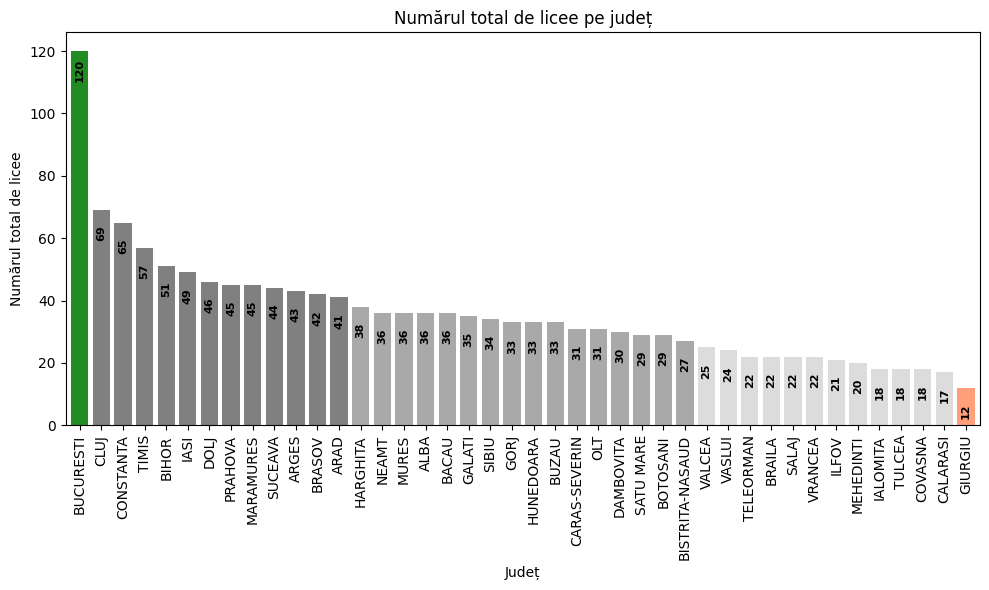

In [6]:
# Redenumire judet "MUNICIPIUL BUCURESTI" ca "BUCURESTI"
data.loc[data['Judet'] == 'MUNICIPIUL BUCURESTI', 'Judet'] = 'BUCURESTI'

# Numar total de licee/judet
nr_licee_pe_judet = data.groupby('Judet')['idSchool'].sum().sort_values(ascending=False)

# Creare grafic numar total licee/judet
plt.figure(figsize=(10, 6))

# Definire culori
colors = ['forestgreen' if nr_licee == max(nr_licee_pe_judet)
          else 'lightsalmon' if nr_licee == min(nr_licee_pe_judet)
          else 'gray' if nr_licee >= 40 
          else 'darkgrey' if nr_licee > 25 
          else 'gainsboro' 
          for nr_licee in nr_licee_pe_judet]

bars = nr_licee_pe_judet.plot(kind='bar', color=colors, width=0.8)

plt.title('Numărul total de licee pe județ')
plt.xlabel('Județ')
plt.ylabel('Numărul total de licee')
plt.xticks(rotation=90)  # Rotirea etichetelor la 90 de grade
plt.tight_layout()

# Adaugare etichete
for bar in bars.patches:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 10, f'{int(bar.get_height())}', 
             ha='center', va='bottom', color='black', fontsize=8, fontweight='bold', rotation=90)

# Afisare grafic
plt.show()

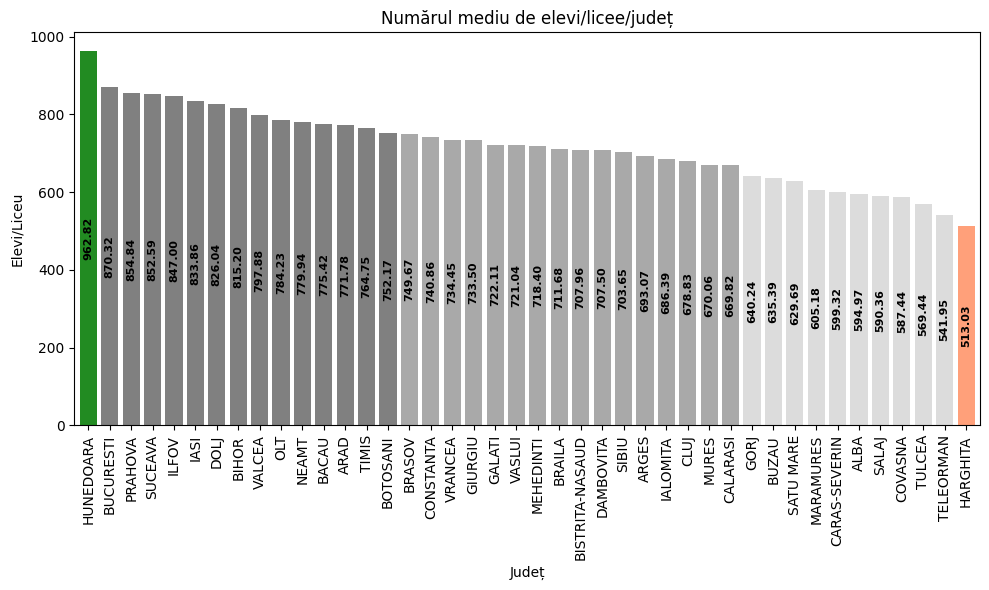

In [7]:
# Creare dataframe numar elevi/liceu
data['Medie_elevi_judet'] = data['Nr_elevi'] / data['idSchool']

# Grupare numar elevi/liceu/judet
medie_pe_judet = data.groupby('Judet')['Medie_elevi_judet'].mean().sort_values(ascending=False)

# Definire culori
colors = ['forestgreen' if valoare == medie_pe_judet.max()
          else 'lightsalmon' if valoare == medie_pe_judet.min()
          else 'gray' if valoare >= 750
          else 'darkgrey' if 650 <= valoare < 750
          else 'gainsboro' if valoare < 650
          else 'lightsalmon' 
          for valoare in medie_pe_judet]

# Creare grafic numar de elevi pe judet
plt.figure(figsize=(10, 6))

bars = medie_pe_judet.plot(kind='bar', color=colors, width=0.8)

plt.title('Numărul mediu de elevi/licee/județ')
plt.xlabel('Județ')
plt.ylabel('Elevi/Liceu')
plt.xticks(rotation=90)
plt.tight_layout()

# Adaugare etichete pentru valori
for bar in bars.patches:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() / 2, f'{bar.get_height():.2f}',
             ha='center', va='center', color='black', fontsize=8, fontweight='bold', rotation=90)

# Afisare graficului
plt.show()

In [8]:
# Selectie date top 5 judete numar elevi/licee/judete
judete_selectate = ['HUNEDOARA', 'BUCURESTI', 'PRAHOVA', 'SUCEAVA', 'ILFOV']
top_liceu_elevi = data[data['Judet'].isin(judete_selectate)][['Judet', 'idSchool', 'Nr_elevi']].sort_values(by='Nr_elevi', ascending=False)

# Selectie date bottom 5 judete numar elevi/licee/judete
judete_selectate = ['HARGHITA', 'TELEORMAN', 'TULCEA', 'COVASNA', 'SALAJ']
bot_liceu_elevi = data[data['Judet'].isin(judete_selectate)][['Judet', 'idSchool', 'Nr_elevi']].sort_values(by='Nr_elevi', ascending=True)

# Afisare dataframe-uri
print("Top 5",top_liceu_elevi)
print()
print("Bottom 5", bot_liceu_elevi)

Top 5         Judet  idSchool  Nr_elevi
27  BUCURESTI       120    104438
31    PRAHOVA        45     38468
35    SUCEAVA        44     37514
21  HUNEDOARA        33     31773
24      ILFOV        21     17787

Bottom 5         Judet  idSchool  Nr_elevi
38     TULCEA        18     10250
14    COVASNA        18     10574
36  TELEORMAN        22     11923
32      SALAJ        22     12988
20   HARGHITA        38     19495


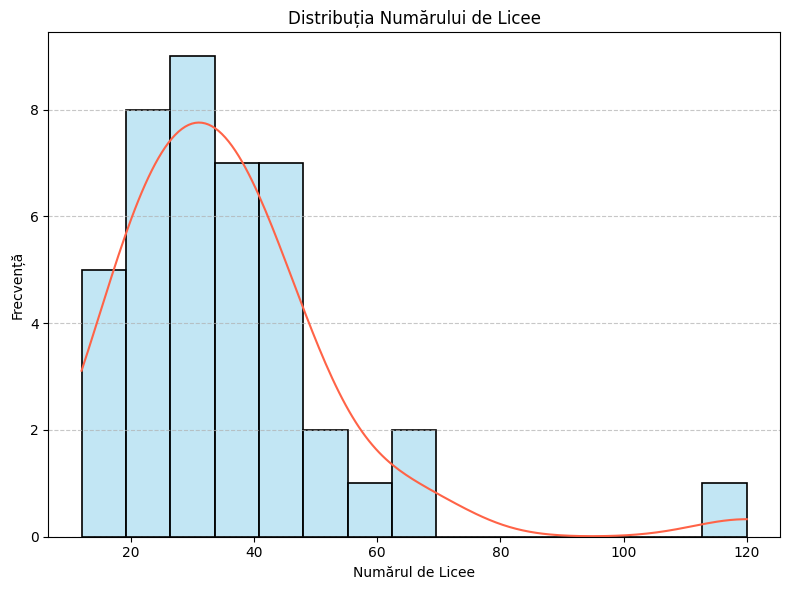

In [9]:
# Creare histograma distributie numar licee
plt.figure(figsize=(8, 6))
hist = sns.histplot(data['idSchool'], bins=15, kde=True, color='skyblue', edgecolor='black', linewidth=1.2)
hist.get_lines()[0].set_color('tomato')
plt.title('Distribuția Numărului de Licee')
plt.xlabel('Numărul de Licee')
plt.ylabel('Frecvență')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Afisare histograma distributie numar licee
plt.show()

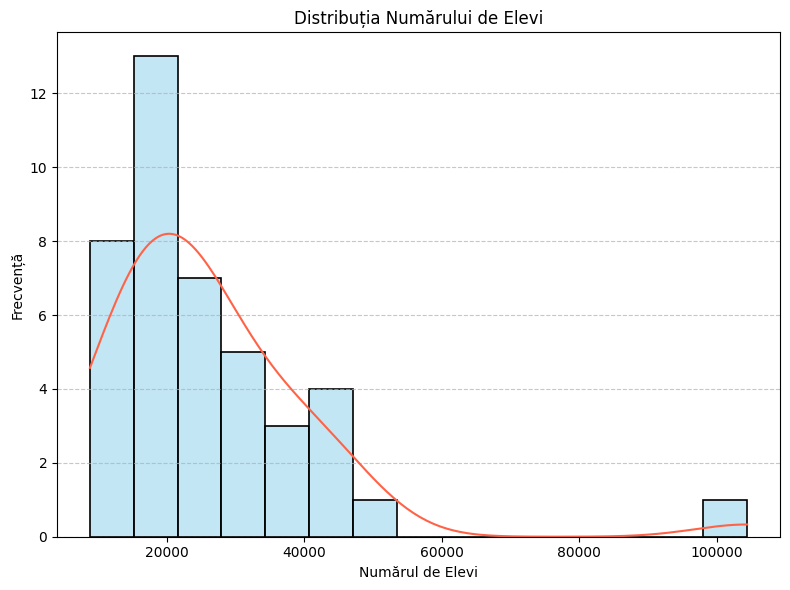

In [10]:
# Creare histograma distributie numar elevi
plt.figure(figsize=(8, 6))
hist = sns.histplot(data['Nr_elevi'], bins=15, kde=True, color='skyblue', edgecolor='black', linewidth=1.2)
hist.get_lines()[0].set_color('tomato')
plt.title('Distribuția Numărului de Elevi')
plt.xlabel('Numărul de Elevi')
plt.ylabel('Frecvență')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Afisare histograma distributie numar elevi
plt.show()

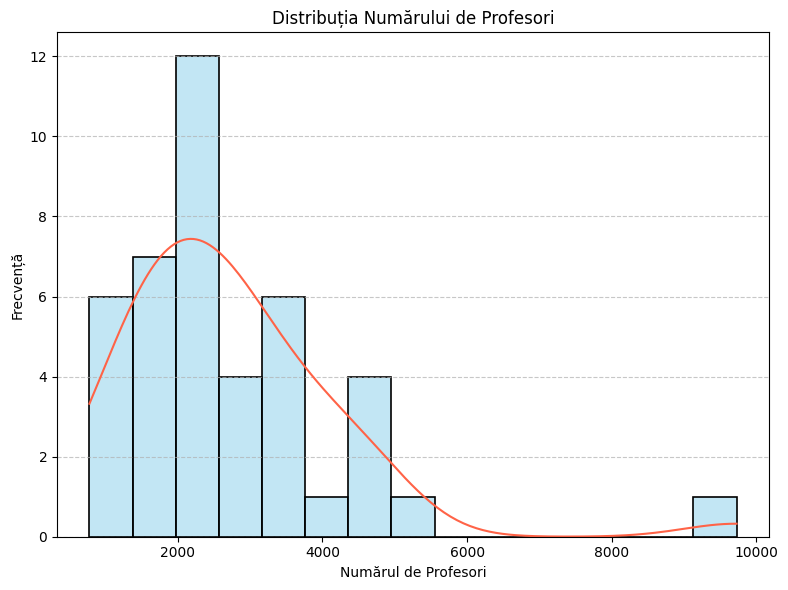

In [11]:
# Creare histograma distributie numar profesori
plt.figure(figsize=(8, 6))
hist = sns.histplot(data['Nr_profesori'], bins=15, kde=True, color='skyblue', edgecolor='black', linewidth=1.2)
hist.get_lines()[0].set_color('tomato')
plt.title('Distribuția Numărului de Profesori')
plt.xlabel('Numărul de Profesori')
plt.ylabel('Frecvență')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Afisare histograma distributie numar profesori
plt.show()

In [12]:
# Calcul coloana 'BAC/Nr_elevi'
data['BAC/Elevi'] = data['Elevi_cu_BAC'] / data['Nr_elevi']

# Calcul coloana 'Profesori/Elevi'
data['Profesori/Elevi'] = data['Nr_profesori'] / data['Nr_elevi']

# Vizualizare sample date
print(data[['Judet', 'Elevi_cu_BAC', 'Nr_elevi', 'BAC/Elevi', 'Profesori/Elevi']].head(10))

             Judet  Elevi_cu_BAC  Nr_elevi  BAC/Elevi  Profesori/Elevi
0             ALBA          1817     21419   0.084831         0.112797
1             ARAD          2047     31643   0.064690         0.100054
2            ARGES          3416     29802   0.114623         0.102577
3            BACAU          3165     27915   0.113380         0.109439
4            BIHOR          2915     41575   0.070114         0.106554
5  BISTRITA-NASAUD          1553     19115   0.081245         0.103217
6         BOTOSANI          2182     21813   0.100032         0.109430
7           BRAILA          1388     15657   0.088650         0.103660
8           BRASOV          2668     31486   0.084736         0.103856
9            BUZAU          2046     20968   0.097577         0.110597


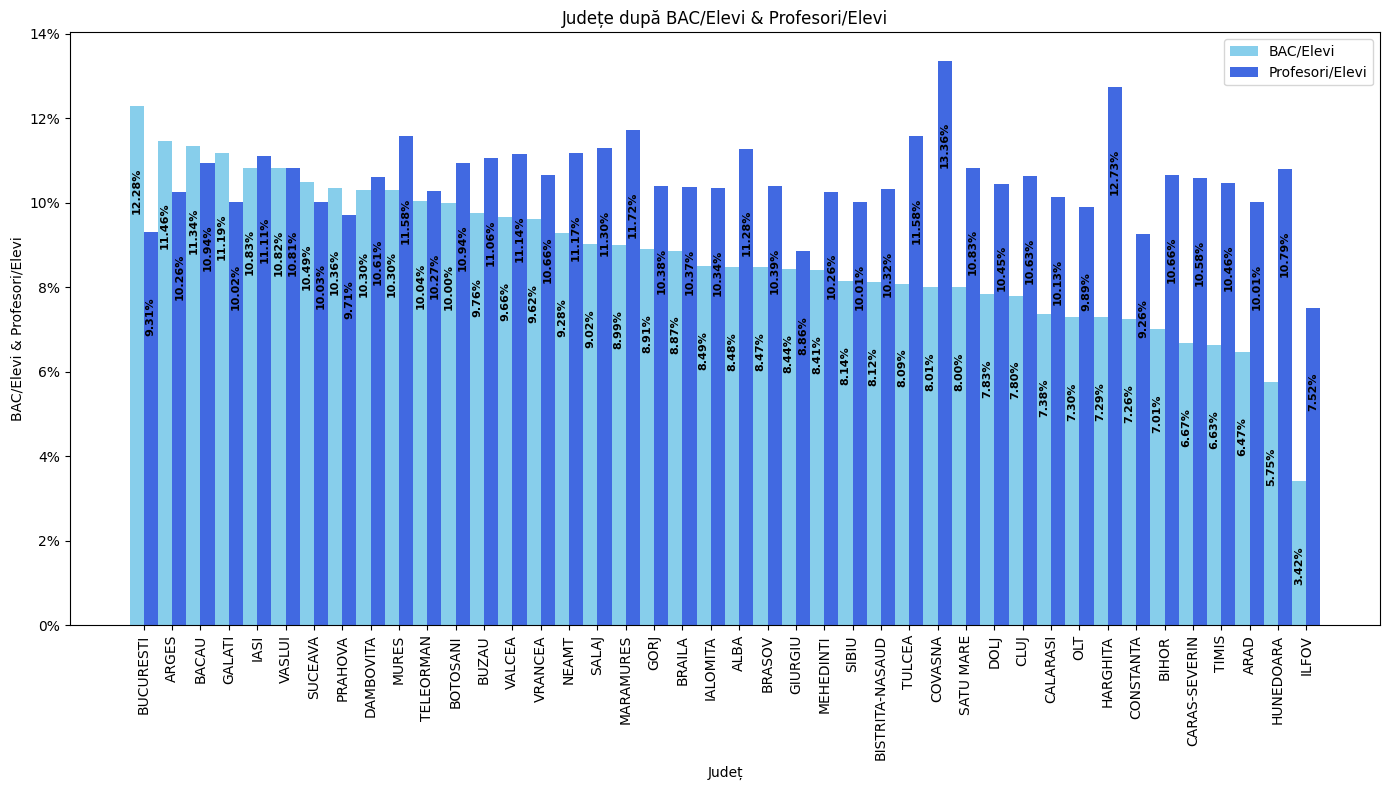

In [13]:
# Sortare date dupa BAC/Nr_elevi
sorted_data = data.sort_values(by='BAC/Elevi', ascending=False)

#Creare grafic
fig, ax = plt.subplots(figsize=(14, 8))
bar_width = 0.5
r1 = range(len(sorted_data))
bars_bac_per_elevi = ax.bar(r1, sorted_data['BAC/Elevi'], width=bar_width, color='skyblue', label='BAC/Elevi', linewidth=1)
bars_prof_per_elevi = ax.bar([x + bar_width for x in r1], sorted_data['Profesori/Elevi'], width=bar_width, color='royalblue', label='Profesori/Elevi', linewidth=1)
plt.title('Județe după BAC/Elevi & Profesori/Elevi')
plt.xlabel('Județ')
plt.ylabel('BAC/Elevi & Profesori/Elevi')
plt.xticks([r + bar_width / 2 for r in range(len(sorted_data))], sorted_data['Judet'], rotation=90)
plt.tight_layout()
plt.legend()
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
ax.grid(False)
label_offset = 0.02

# Adadaugare etichete
for bar1, bar2 in zip(bars_bac_per_elevi, bars_prof_per_elevi):
    yval1 = bar1.get_height()
    ax.text(bar1.get_x() + bar1.get_width() / 2, yval1 - label_offset, f"{yval1*100:.2f}%", va='center', ha='center', rotation=90, fontsize=8, fontweight='bold')

    yval2 = bar2.get_height()
    ax.text(bar2.get_x() + bar2.get_width() / 2, yval2 - label_offset, f"{yval2*100:.2f}%", va='center', ha='center', rotation=90, fontsize=8, fontweight='bold')

# Afisare grafic
plt.show()

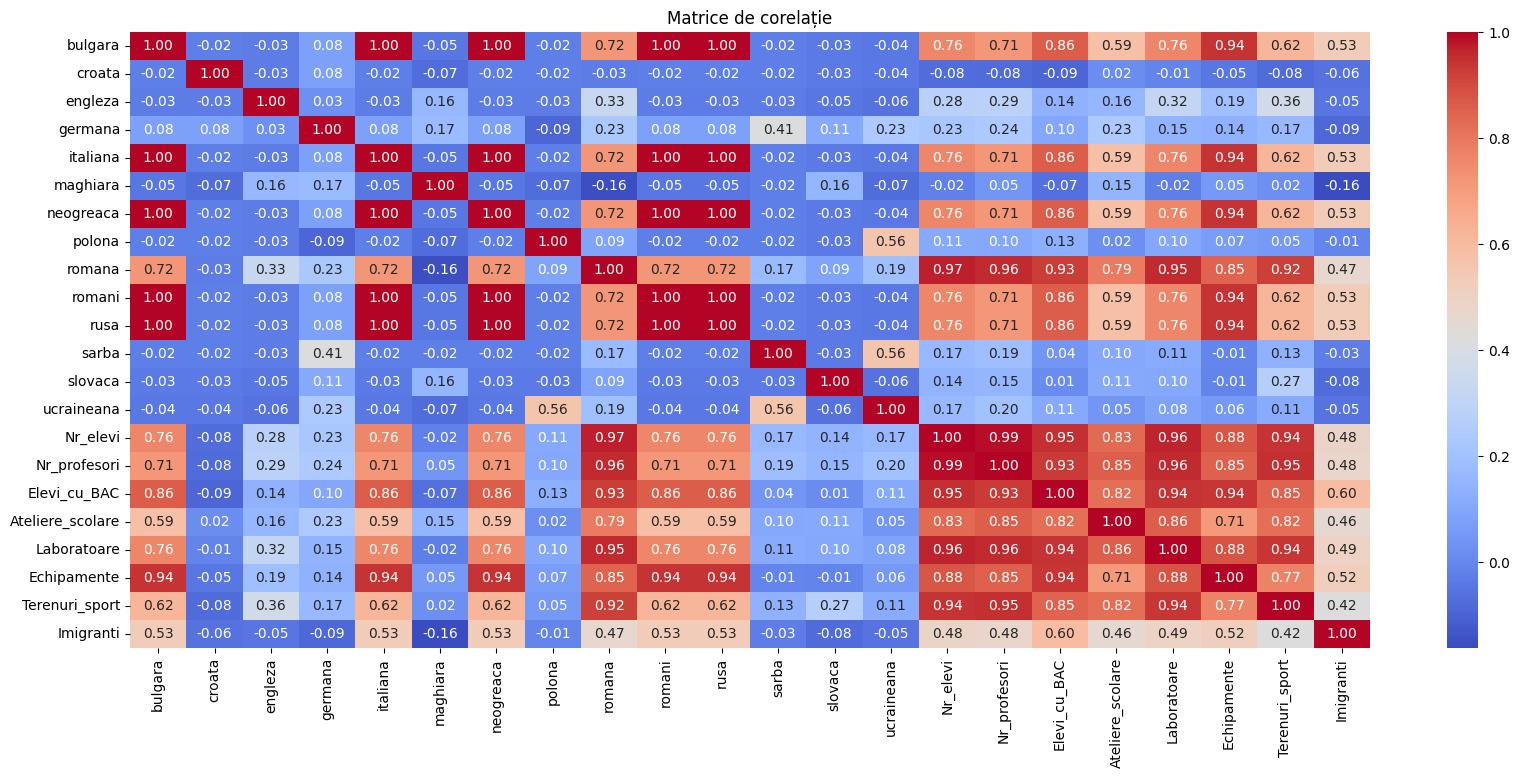

In [14]:
# Creare dataframe date interes matrice corelatie
data_numeric = data.drop(['Judet', 'idSchool', 'BAC/Elevi', 'Profesori/Elevi', 'Medie_elevi_judet'], axis=1)

# Calcul matrice corelatie
correlation_matrix = data_numeric.corr()

# Vizualizare matrice corelatie
plt.figure(figsize=(20, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matrice de corelație')
plt.show()

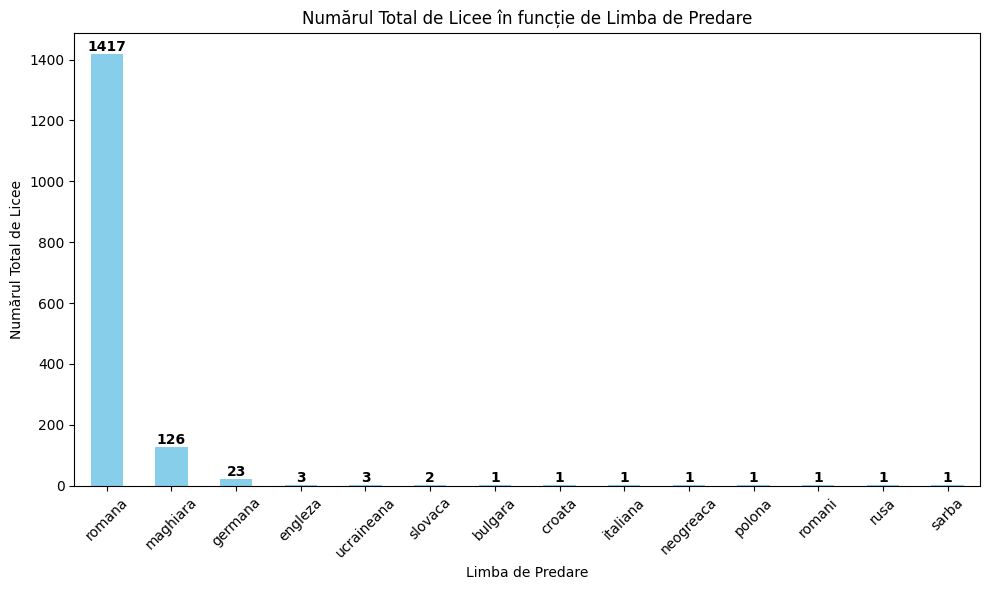

In [15]:
# Creare dataframe licee/limbi de predare
limbi_predare = ['bulgara', 'croata', 'engleza', 'germana', 'italiana', 'maghiara', 'neogreaca',
                 'polona', 'romana', 'romani', 'rusa', 'sarba', 'slovaca', 'ucraineana']

# Total licee/limbi predare
numar_licee_limba_predare = data[limbi_predare].sum()

# Creare grafic licee/limbi predare
plt.figure(figsize=(10, 6))
bar_plot = numar_licee_limba_predare.sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title('Numărul Total de Licee în funcție de Limba de Predare')
plt.xlabel('Limba de Predare')
plt.ylabel('Numărul Total de Licee')
plt.xticks(rotation=45)

# Adaugare etichete
for i, value in enumerate(numar_licee_limba_predare.sort_values(ascending=False)):
    bar_plot.text(i, value + 10, str(value), ha='center', color='black', fontweight='bold')

plt.tight_layout()
plt.show()

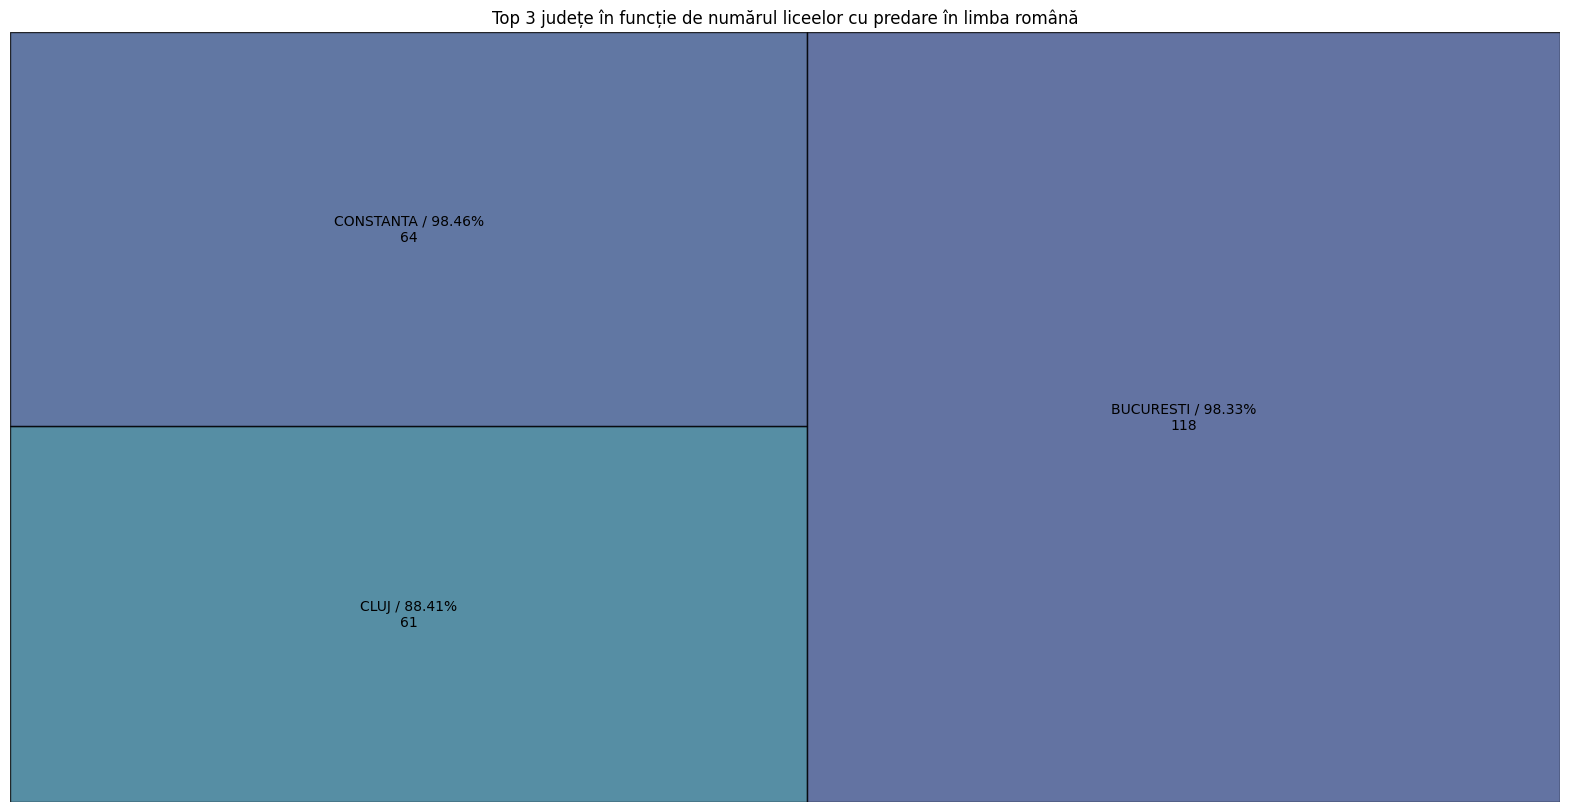

In [16]:
import squarify

# Top 3 judete dupa numarul de licee cu predare in romana
top_3_romana = data.nlargest(3, 'romana')['Judet']

# Pondere licee cu predare in lima romana/total licee cu predare in limba romana
procent_romana = (data.loc[data['Judet'].isin(top_3_romana), 'romana'] / data.loc[data['Judet'].isin(top_3_romana), 'idSchool']).mul(100).round(2)

# Creare treemap
plt.figure(figsize=(20, 10))
sizes = data.loc[data['Judet'].isin(top_3_romana), 'romana']
labels = data.loc[data['Judet'].isin(top_3_romana), 'Judet'].astype(str) + ' / ' + procent_romana.astype(str) + '%' + '\n' + data.loc[data['Judet'].isin(top_3_romana), 'romana'].astype(str)
squarify.plot(sizes=sizes, label=labels, alpha=0.8, linewidth=1, edgecolor='black')
plt.title('Top 3 județe în funcție de numărul liceelor cu predare în limba română')
plt.axis('off')

plt.show()

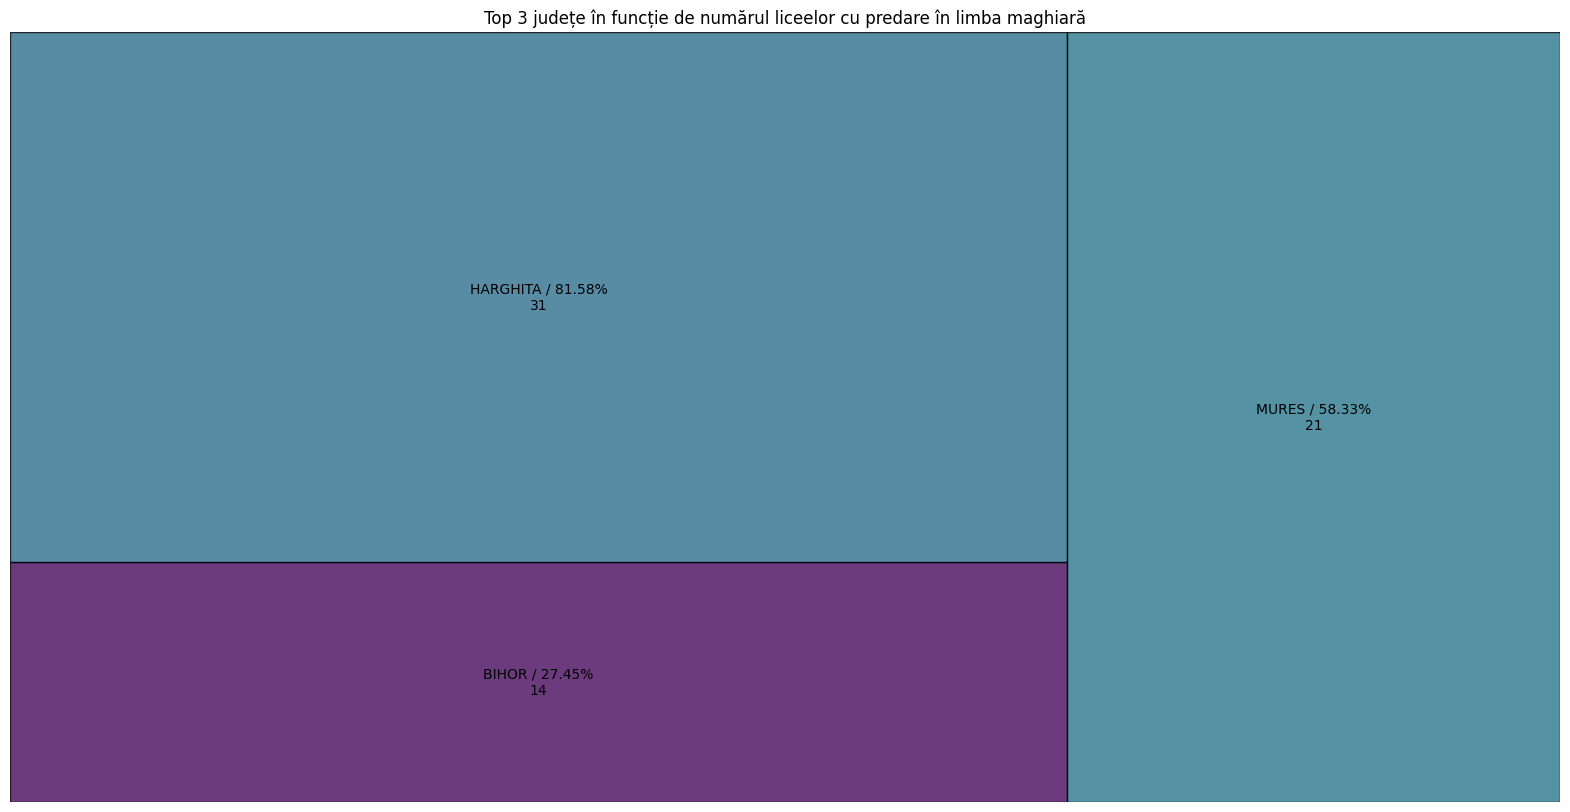

In [17]:
# Top 3 judete dupa numarul de licee cu predare in maghiara
top_3_maghiara = data.nlargest(3, 'maghiara')['Judet']

# Pondere licee cu predare in lima maghiara/total licee cu predare in limba maghiara
procent_maghiara = (data.loc[data['Judet'].isin(top_3_maghiara), 'maghiara'] / data.loc[data['Judet'].isin(top_3_maghiara), 'idSchool']).mul(100).round(2)

# Creare treemap
plt.figure(figsize=(20, 10))
sizes = data.loc[data['Judet'].isin(top_3_maghiara), 'maghiara']
labels = data.loc[data['Judet'].isin(top_3_maghiara), 'Judet'].astype(str) + ' / ' + procent_maghiara.astype(str) + '%' + '\n' + data.loc[data['Judet'].isin(top_3_maghiara), 'maghiara'].astype(str)
squarify.plot(sizes=sizes, label=labels, alpha=0.8, linewidth=1, edgecolor='black')
plt.title('Top 3 județe în funcție de numărul liceelor cu predare în limba maghiară')
plt.axis('off')

plt.show()

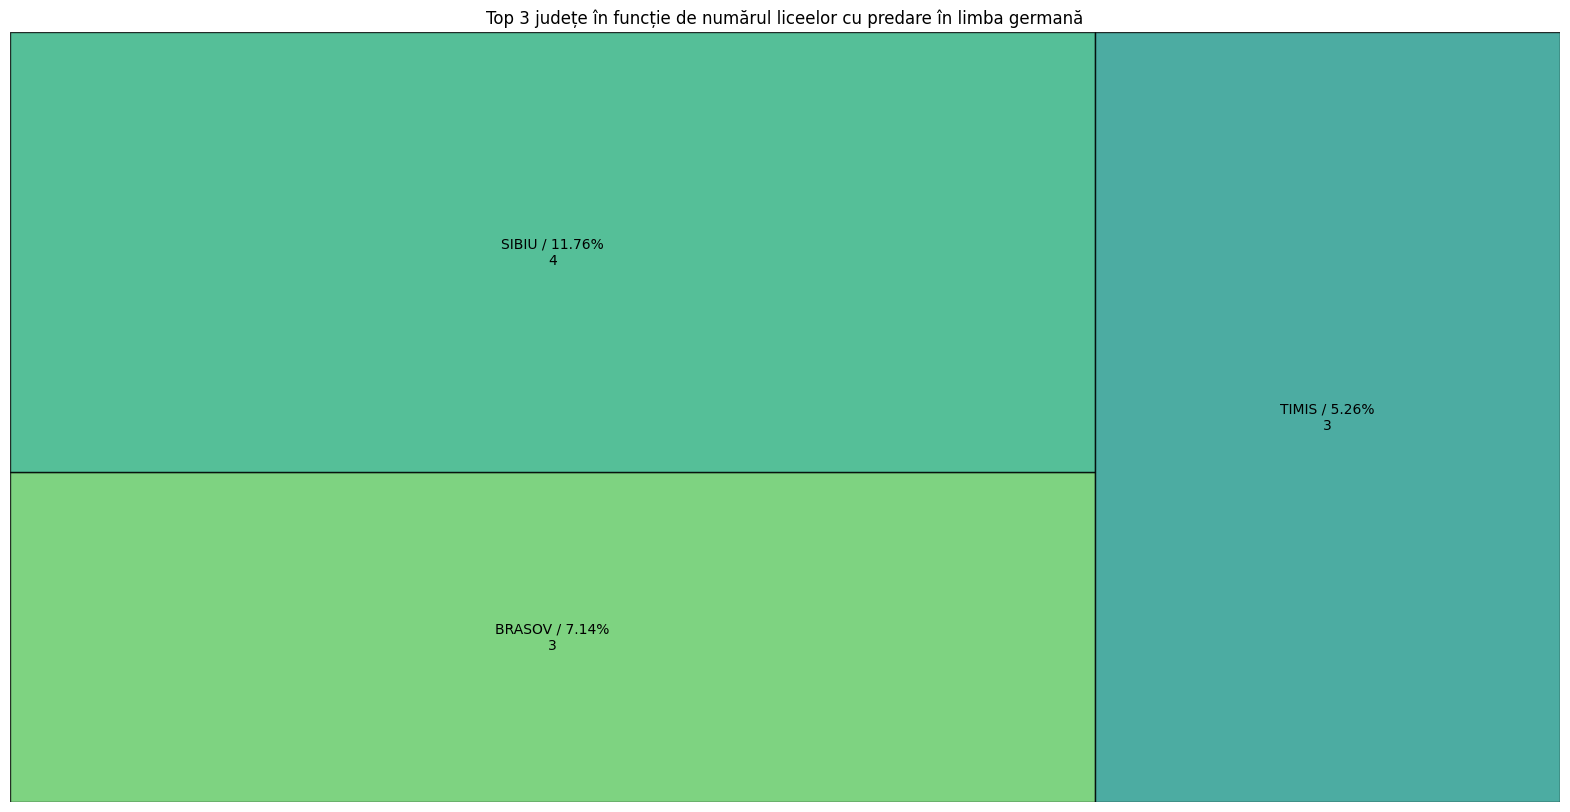

In [18]:
# Top 3 judete dupa numarul de licee cu predare in germana
top_3_germana = data.nlargest(3, 'germana')['Judet']

# Pondere licee cu predare in lima germana/total licee
procent_germana = (data.loc[data['Judet'].isin(top_3_germana), 'germana'] / data.loc[data['Judet'].isin(top_3_germana), 'idSchool']).mul(100).round(2)

# Creare treemap
plt.figure(figsize=(20, 10))
sizes = data.loc[data['Judet'].isin(top_3_germana), 'germana']
labels = data.loc[data['Judet'].isin(top_3_germana), 'Judet'].astype(str) + ' / ' + procent_germana.astype(str) + '%' + '\n' + data.loc[data['Judet'].isin(top_3_germana), 'germana'].astype(str)
squarify.plot(sizes=sizes, label=labels, alpha=0.8, linewidth=1, edgecolor='black')
plt.title('Top 3 județe în funcție de numărul liceelor cu predare în limba germană')
plt.axis('off')

plt.show()